<a href="https://colab.research.google.com/github/SH1V4M100/Genetic_Algo/blob/main/GeneticAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.8 MB/s eta 0:00:00


In [ ]:
#Required Libraries
import random,statistics
import matplotlib.pyplot as plt
import numpy as np
from deap import base, creator, tools, algorithms

In [ ]:
num_locations = 20
locations = [(random.randint(0,100),random.randint(0,100)) for _ in range(num_locations)]
depot = (50,50)
num_vehicles = 3

In [ ]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
pop=toolbox.population(3)
pop

[[0, 16, 10, 17, 15, 9, 12, 14, 13, 7, 8, 1, 4, 5, 3, 6, 18, 11, 2, 19],
 [9, 6, 17, 15, 14, 5, 4, 1, 3, 2, 13, 8, 16, 7, 18, 12, 19, 10, 0, 11],
 [0, 7, 4, 1, 5, 8, 15, 11, 18, 13, 10, 19, 9, 12, 6, 14, 16, 2, 17, 3]]

In [ ]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty
toolbox.register("evaluate", evalVRP)

<class 'tuple'>


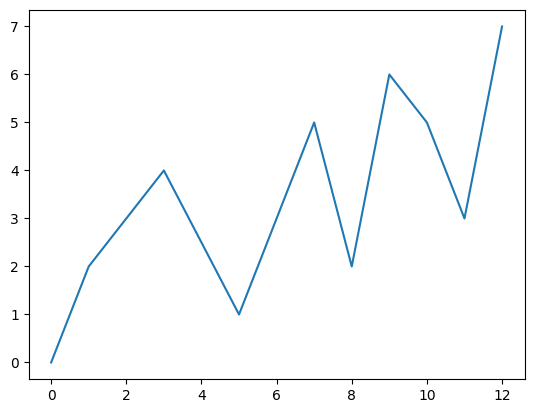

(1104.9577454064283, 73.84144789527873)

In [ ]:
coordinates = [
    (0, 0),
    (1, 2),
    (3, 4),
    (5, 1),
    (6, 3),
    (7, 5),
    (8, 2),
    (9, 6),
    (10, 5),
    (11, 3),
    (12, 7)
]
x,y=zip(*coordinates)
print(type(x))
plt.plot(x,y)
plt.show()
evalVRP(pop[0])

In [ ]:


#Mating Methods for sequence of indices
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.cxPartialyMatched
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.cxUniformPartialyMatched
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.cxOrdered

#Mutation Methods for Sequences
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.mutShuffleIndexes

In [ ]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')
    # Plot routes as lines between locations
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[pop[0][j]] for j in range(i, len(pop[0]), num_vehicles)] + [depot]
        x, y = zip(*vehicle_route)
        plt.plot(x, y,'--',label=f'Vehicle {i+1}')
    plt.legend()
    plt.show()


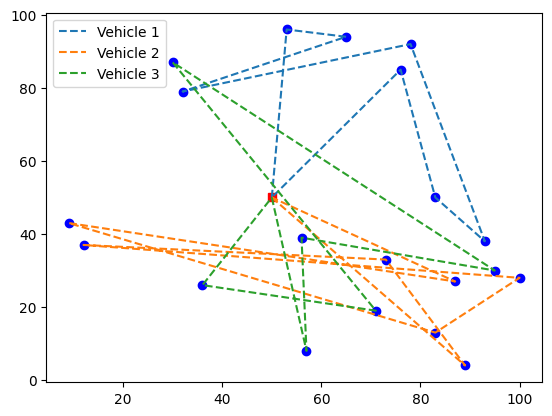

In [ ]:
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')
    # Plot routes as lines between locations
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[pop[0][j]] for j in range(i, len(pop[0]), num_vehicles)] + [depot]
        x, y = zip(*vehicle_route)
        plt.plot(x, y,'--',label=f'Vehicle {i+1}')
    plt.legend()
    plt.show()

In [ ]:
def visualise_trends(loglist):


  # Plotting results in subplots
  num_plots = len(loglist)
  fig, axes = plt.subplots(1, num_plots, figsize=(15, 5), sharey=True)

  for i, result in enumerate(loglist):
    ax = axes[i]
    generations = result.select("gen")
    best_fitness = result.select("max")
    ax.plot(generations, best_fitness, label=str(f'param set {i}'))
    ax.set_xlabel("Generation")
    ax.set_ylabel("Best Fitness Score")
    ax.set_title("Visualise trends")
    ax.grid(True)

plt.suptitle("Best Fitness Score Over Generations for Different Parameters")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<Figure size 640x480 with 0 Axes>

gen	nevals	avg    	min    	max    
0  	300   	599.061	5.53084	1396.96
1  	197   	572.018	5.14289	1323.37
2  	194   	558.209	3.32397	1335.14
3  	184   	553.349	4.07396	1323.68
4  	198   	542.435	4.07396	1335.13
5  	195   	531.252	5.56855	1288.86
6  	170   	526.076	5.94537	1343.63
7  	187   	518.969	5.94537	1283.33
8  	175   	519.797	2.76458	1303.64
9  	184   	507.287	2.93223	1366.58
10 	194   	502.516	2.38341	1276.96
11 	182   	486.461	1.16849	1243.64
12 	180   	473.093	2.50636	1311.85
13 	175   	447.229	3.01375	1311.61
14 	178   	435.879	3.01375	1314.52
15 	179   	423.759	1.08496	1317.75
16 	169   	409.525	2.44028	1139.56
17 	183   	404.331	2.04335	1208.4 
18 	184   	399.423	2.04335	1102.66
19 	190   	392.642	1.93021	1253.7 
20 	163   	383.662	2.04335	1028.76
21 	187   	380.967	1.77121	1145.78
22 	163   	374.979	1.99216	1147.84
23 	175   	372.755	1.93067	1167.45
24 	169   	365.618	5.49545	1026.58
25 	176   	363.651	3.5874 	1003.88
26 	193   	356.438	3.26088	989.691
27 	195   	349.147	1

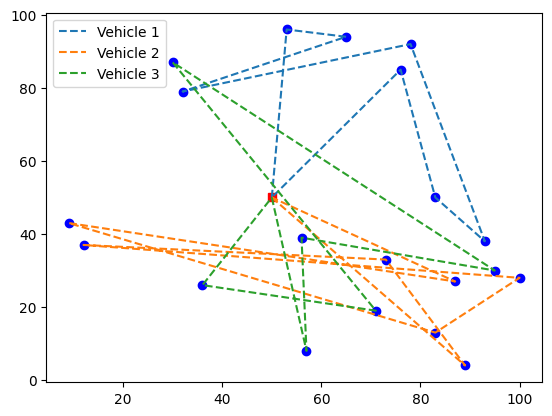

gen	nevals	avg    	min    	max    
0  	300   	599.061	5.53084	1396.96
1  	230   	581.654	2.02069	1352.51
2  	227   	575.652	3.9092 	1332.03
3  	204   	566.09 	4.73446	1375.38
4  	210   	560.572	1.2018 	1346.87
5  	221   	557.768	1.04676	1302.73
6  	204   	549.29 	0.493372	1292.17
7  	228   	554.287	2.02532 	1378.23
8  	210   	552.205	4.53801 	1308.16
9  	208   	553.559	6.17123 	1340.57
10 	208   	545.669	2.0508  	1295.17
11 	205   	546.027	4.35443 	1396.68
12 	217   	547.926	7.76929 	1304.55
13 	225   	549.359	5.60329 	1307.83
14 	220   	550.165	2.10046 	1340.97
15 	227   	556.886	2.03056 	1266.04
16 	208   	551.127	5.95732 	1340.45
17 	204   	549.158	4.9422  	1366.59
18 	220   	551.177	3.8539  	1331.36
19 	219   	551.95 	7.6309  	1354.25
20 	222   	552.004	3.68318 	1323.22
21 	210   	543.521	3.68318 	1308.08
22 	211   	547.563	4.27511 	1347.05
23 	222   	544.491	4.27511 	1352.02
24 	217   	547.637	3.90174 	1339.95
25 	215   	547.714	7.61706 	1330.09
26 	220   	555.577	3.03014 	1327.91

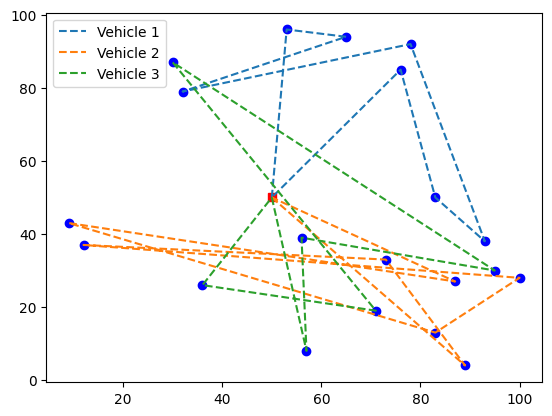

gen	nevals	avg    	min    	max    
0  	300   	599.061	5.53084	1396.96
1  	141   	560.016	5.53084	1285.29
2  	139   	543.983	2.28976	1405.65
3  	134   	522.459	5.53084	1384.49
4  	129   	506.925	4.86299	1372.5 
5  	138   	490.772	2.56697	1307.66
6  	121   	471.032	6.65635	1200.18
7  	130   	463.685	7.56934	1326.36
8  	130   	462.544	5.64766	1239.87
9  	151   	456.931	0.325604	1324.81
10 	122   	430.502	0.325604	1192.89
11 	125   	423.634	1.14356 	1218.93
12 	146   	428.593	4.69115 	1193.18
13 	136   	409.775	3.19387 	1187.23
14 	144   	389.438	2.98837 	1237.3 
15 	136   	386.382	5.66161 	1075.89
16 	148   	383.271	5.41955 	1193.81
17 	131   	384.094	4.71697 	1174.63
18 	133   	390.6  	4.27765 	1264.95
19 	131   	364.749	3.97648 	1164.15
20 	152   	361.802	14.6261 	1105.94
21 	143   	358.86 	8.34036 	988.592
22 	151   	358.258	14.6261 	1042.42
23 	135   	352.218	13.0613 	1181.75
24 	144   	347.426	14.6261 	1032.73
25 	122   	338.937	8.57343 	1014.48
26 	143   	333.757	11.5484 	1019.03
27

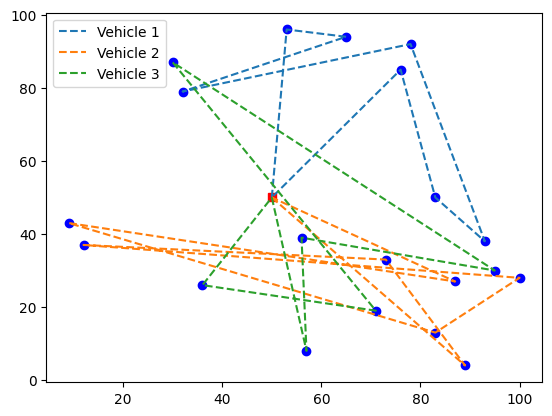

In [ ]:
# Running the Genetic Algorithm
def run_ea(params):
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    # Genetic Operators
    toolbox.register("mate", tools.cxPartialyMatched)
    toolbox.register("mutate", tools.mutShuffleIndexes,indpb=0.05)
    toolbox.register("select", tools.selTournament,tournsize=params['tournsize'])
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop,logbook=algorithms.eaSimple(pop, toolbox, params['cxpb'], params['mutpb'], params['gen'], stats=stats, halloffame=hof)
    plot_routes(hof)
    return logbook


params = [
    {'tournsize': 3, 'cxpb': 0.5, 'mutpb': 0.2, 'gen': 30},
    {'tournsize': 2, 'cxpb': 0.6, 'mutpb': 0.3, 'gen': 30},
    {'tournsize': 4, 'cxpb': 0.4, 'mutpb': 0.1, 'gen': 30}
]
loglist=[]
for i in range(len(params)):
  logbook=run_ea(params[i])
  loglist.append(logbook)

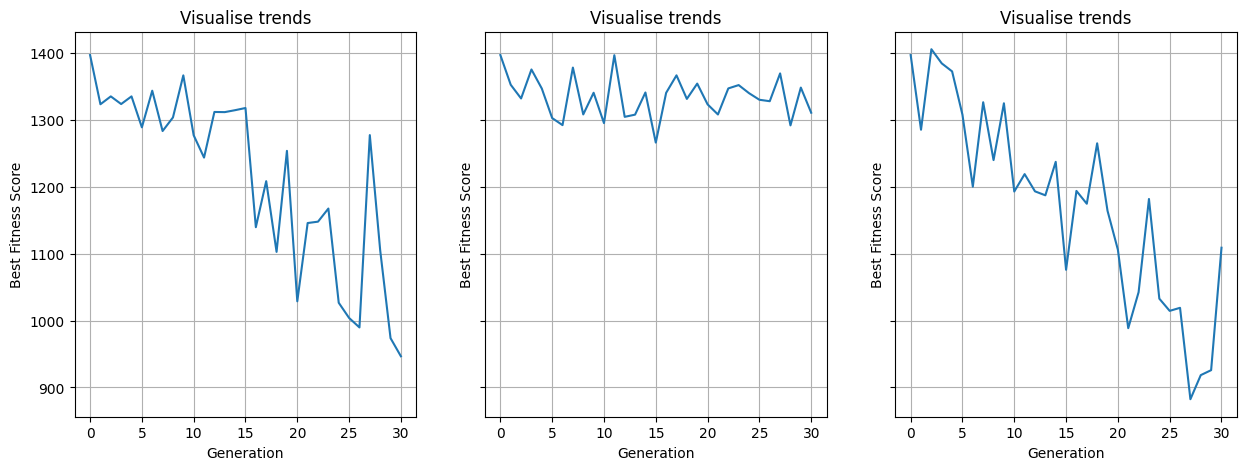

In [ ]:
visualise_trends(loglist)